In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use(['seaborn-notebook'])

C:\Users\HP\AppData\Local\Temp\ipykernel_4828\2873717403.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-notebook'])


In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8360 entries, 0 to 8359
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      8360 non-null   object 
 1   CPU       8360 non-null   float64
 2   memory    8360 non-null   float64
 3   cpu_temp  8354 non-null   float64
 4   output    8360 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 326.7+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

time        0
CPU         0
memory      0
cpu_temp    0
output      0
dtype: int64

In [8]:
df.columns

Index(['time', 'CPU', 'memory', 'cpu_temp', 'output'], dtype='object')

<Axes: xlabel='CPU', ylabel='memory'>

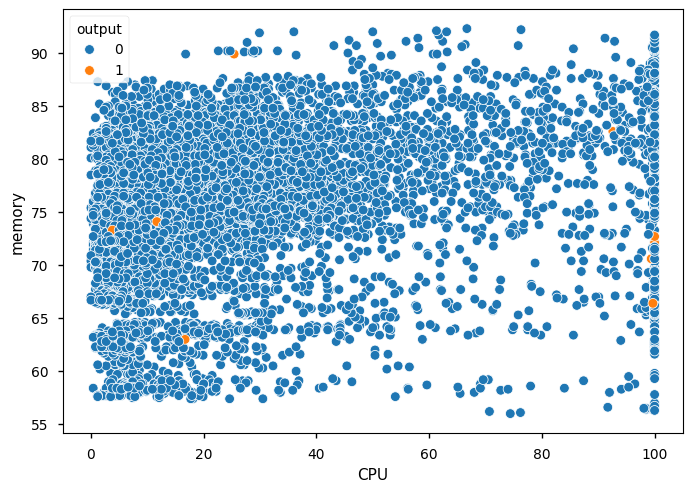

In [9]:
sns.scatterplot(x = df['CPU'], y = df['memory'], hue=df['output'])

In [10]:
len(df)

8354

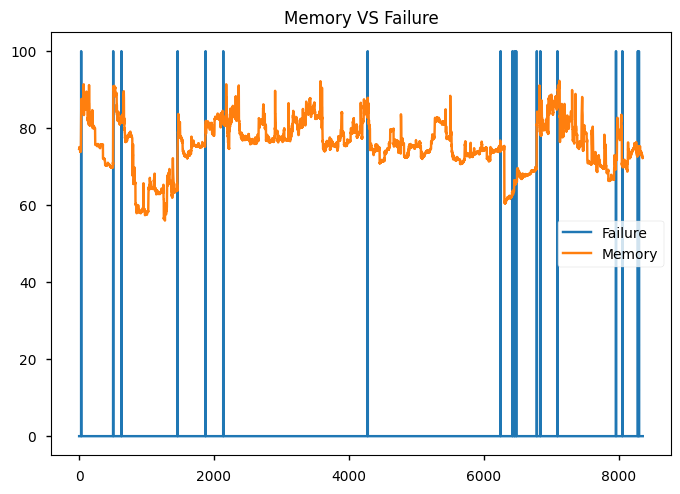

In [16]:
dt = 50
not_failures = df['output'] == 0
plt.plot(100*df['output'], label = "Failure")
plt.plot(df['memory'][not_failures], label = "Memory")
plt.title('Memory VS Failure')
plt.legend()

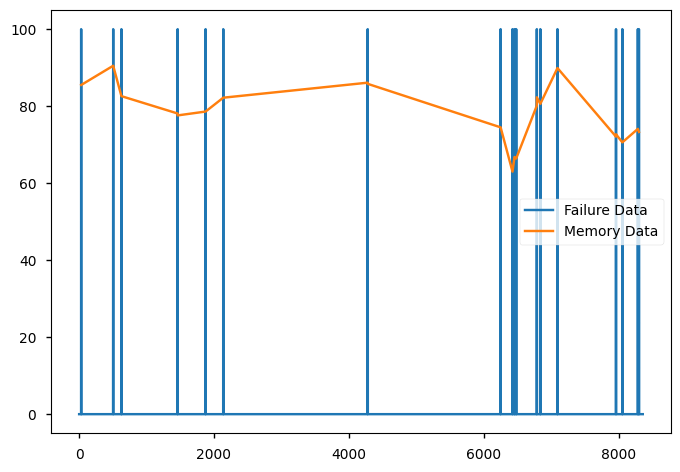

In [12]:
dt = 30
failures = df['output'] == 1
plt.plot(100*df['output'], label = "Failure Data")
plt.plot(df['memory'][failures], label = "Memory Data")
plt.legend()

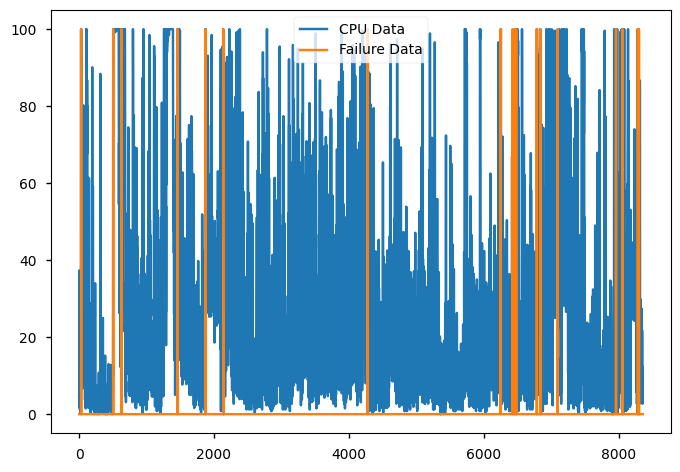

In [17]:
# dt = 50
not_failures = df['output'] == 0
plt.plot(df['CPU'][not_failures], label = "CPU Data")
plt.plot(100*df['output'], label = "Failure Data")
plt.legend()

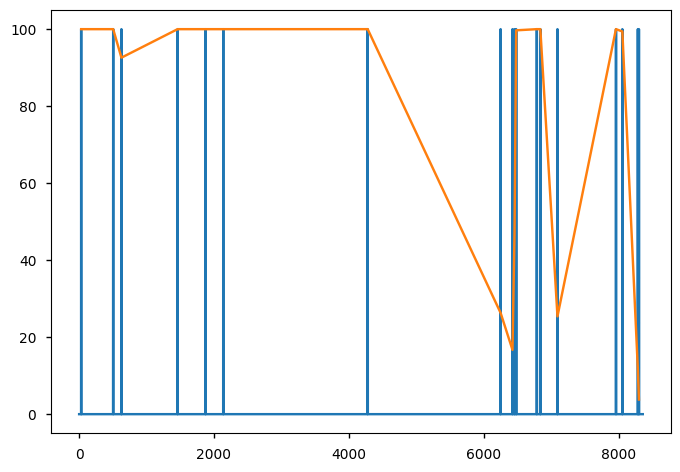

In [18]:
# dt = 30
failures = df['output'] == 1
plt.plot(100*df['output'])
plt.plot(df['CPU'][failures])

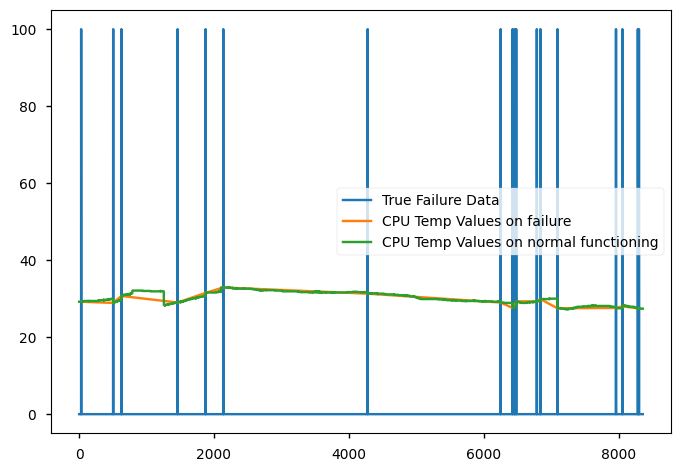

In [26]:
# failures = df['output'] == 1
plt.plot(100*df['output'], label = 'True Failure Data')
plt.plot(df['cpu_temp'][failures], label = 'CPU Temp Values on failure')
plt.plot(df['cpu_temp'][not_failures], label = 'CPU Temp Values on normal functioning')
plt.legend()

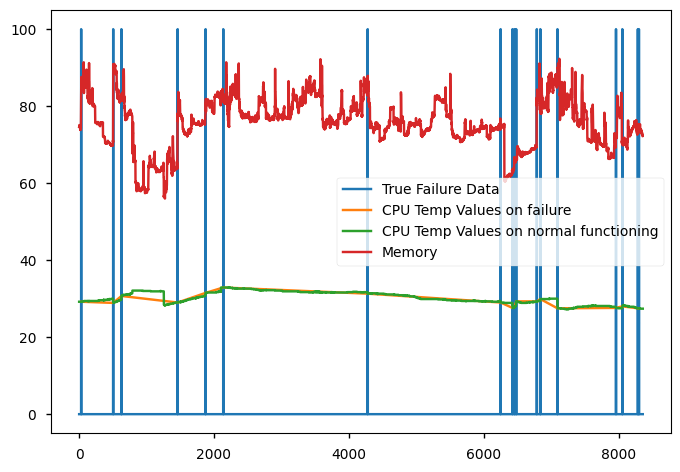

In [27]:
plt.plot(100*df['output'], label = 'True Failure Data')
plt.plot(df['cpu_temp'][failures], label = 'CPU Temp Values on failure')
plt.plot(df['cpu_temp'][not_failures], label = 'CPU Temp Values on normal functioning')
plt.plot(df['memory'], label = "Memory")
plt.legend()

In [35]:
df['time'] = pd.to_datetime(df['time'])
df['time'] = (df['time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [36]:
X = df[['time', 'CPU', 'memory', 'cpu_temp']].values
y = df['output'].values

In [37]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)

In [40]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [41]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
209/209 [==============================] - 1s 2ms/step - loss: 0.3169 - accuracy: 0.9738 - val_loss: 0.0708 - val_accuracy: 0.9964
Epoch 2/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9976 - val_loss: 0.0379 - val_accuracy: 0.9964
Epoch 3/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9976 - val_loss: 0.0353 - val_accuracy: 0.9964
Epoch 4/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9976 - val_loss: 0.0347 - val_accuracy: 0.9964
Epoch 5/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.9976 - val_loss: 0.0341 - val_accuracy: 0.9964
Epoch 6/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9976 - val_loss: 0.0334 - val_accuracy: 0.9964
Epoch 7/10
209/209 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.9976 - val_loss: 0.0326 - val_accuracy: 0.9964
Epoch 

In [44]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

53/53 [==============================] - 0s 690us/step - loss: 0.0291 - accuracy: 0.9964
Test loss: 0.02911350317299366, Test accuracy: 0.9964093565940857
